In [1]:
import numpy as np
import matplotlib.pyplot as plt


patterns = np.array([
    [-1, 1, -1, 1],
    [-1, -1, 1, 1],
    [1, 1, 1, 1],
    
])

targets = np.array([[-1, 1 ,1 , -1]])


# Single perceptron (just testing) 

In [2]:
def init_weights(X, T, mu = 0, sigma = 0.1):
    return np.random.normal(0, sigma,(T.shape[0], X.shape[0]))



def learn(X, T, epochs = 20, learning_rate = 0.001):
    W = init_weights(X, T)
    for i in range(epochs):
        delta_W = -learning_rate * (W@X - T)@X.T
        W += delta_W
    return W

In [3]:
_patterns = np.vstack([patterns, np.ones(patterns.shape[1])]) #row for biases
W = learn(_patterns, targets)

# With hidden layer... (just testing)

In [4]:
lr = 0.001
n_samples = targets.shape[1]
num_targets = targets.shape[0] # number of targets for each sample
d_in = patterns.shape[0]
hidden_dim = 5

#init weights
W = np.random.normal(0, 0.1, (hidden_dim, d_in + 1))
V = np.random.normal(0, 0.1, (num_targets, hidden_dim + 1))

#forward pass
H_in = W @ np.vstack([patterns, np.ones(patterns.shape[1])]) #row for biases
H_out = 2/ (1 + np.exp(-H_in)) - 1
H_out = np.vstack([H_out, np.ones(H_out.shape[1])])

O_in = V @ H_out
O = 2 / (1 + np.exp(-O_in)) - 1

#backward pass
dw = 0
dv = 0
alpha = 0.9

delta_O = (O - targets) * ((1 + O) * (1- O)) * 0.5
delta_H = (V.T @ delta_O) * ((1 + H_out) * (1-H_out)) * 0.5
delta_H = delta_H[:-1,]


dw = (dw * alpha) - (1 - alpha) * delta_H @ _patterns.T
dv = (dv * alpha) - (1 - alpha) * delta_O @ H_out.T

W = W + dw * lr
V = V + dv * lr

In [5]:
def forward(inputs, W, V):
    H_in = W @ inputs 
    H_out = 2/ (1 + np.exp(-H_in)) - 1
    H_out = np.vstack([H_out, np.ones(H_out.shape[1])])
    O_in = V @ H_out
    O = 2 / (1 + np.exp(-O_in)) - 1
    return O, H_out

def backward(inputs, targets, out, H_out, V, dw, dv, alpha = 0.9):
    delta_O = (out - targets) * ((1 + out) * (1- out)) * 0.5
    delta_H = (V.T @ delta_O) * ((1 + H_out) * (1-H_out)) * 0.5
    delta_H = delta_H[:-1,]

    dw = (dw * alpha) - (1 - alpha) * delta_H @ inputs.T
    dv = (dv * alpha) - (1 - alpha) * delta_O @ H_out.T
    return dw, dv
    
def two_layers(inputs, targets, W, V, epochs = 20, hidden_dim = 5, lr = 0.001):
    dw, dv = 0,0
    for _ in range(epochs):
        out, H_out = forward(inputs, W, V)
        dw, dv = backward(inputs, targets, out, H_out, V, dw, dv)
        W += lr * dw
        V += lr * dv

In [6]:
lr = 0.001
n_samples = targets.shape[1]
num_targets = targets.shape[0] # number of targets for each sample
d_in = patterns.shape[0]
hidden_dim = 5

#init weights
W = np.random.normal(0, 0.1, (hidden_dim, d_in + 1))
V = np.random.normal(0, 0.1, (num_targets, hidden_dim + 1))

inputs = np.vstack([patterns, np.ones(patterns.shape[1])]) #row for biases
two_layers(inputs, targets, W, V)
    
 

# Assignment - Part I

Please choose parameters, mA, mB, sigmaA, sigmaB, yourselves to make sure that
the two sets are linearly separable (so the means of the two distributions, mA and
mB, should be sufficiently different). You can generate n=100 points per class
and shuffle samples (randperm indexes in MATLAB) so that in your dataset you
would not have just two concatenated blocks of samples from the same class.

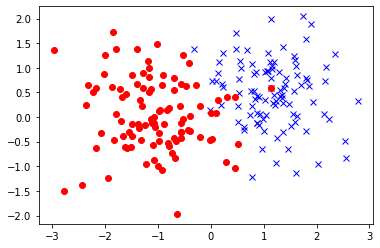

In [27]:
np.random.seed(1)


def sample_data(n, mean_A, cov_A, mean_B, cov_B, add_bias = True, shuffle = True):
    class_A = np.random.multivariate_normal(mean_A, cov_A, n).T
    class_B = np.random.multivariate_normal(mean_B, cov_B, n).T
    samples = np.column_stack([class_A, class_B])
    targets = np.column_stack([-np.ones((1,n)), np.ones((1,n))]) #add targets, -1 for class A, 1 for class B

    if add_bias:
        samples= np.vstack([samples, np.ones(2*n)]) #add ones for bias 

    if shuffle:
        p = np.random.permutation(samples.shape[1]) #shuffle the targets & samples
        samples = samples[:,p]
        targets = targets[:,p]
    return class_A, class_B, samples, targets 
    
n = 100                      #number of samples for each class
mean_A = [1., .5]
cov_A = [[0.5, 0], 
         [0, 0.5]]  

mean_B = [-1., 0]
cov_B = [[0.5, 0], 
         [0, 0.5]]    

class_A, class_B, samples, targets = sample_data(n, mean_A, cov_A, mean_B, cov_B, add_bias = True, shuffle = True)
plt.plot(class_A[0], class_A[1], 'x', c= 'blue')
plt.plot(class_B[0], class_B[1], 'o', c = 'red')
plt.show()

1. Apply and compare perceptron learning with the Delta learning rule in
batch mode on the generated dataset. Adjust the learning rate and study
the convergence of the two algorithms.

In [28]:
def init_weights(X, T, mu = 0, sigma = 0.1):
    return np.random.normal(0, sigma,(T.shape[0], X.shape[0]))

def delta_learn(X, T, epochs = 20, learning_rate = 0.001):
    W = init_weights(X, T)
    all_W = np.zeros((W.shape[1], epochs))
    mse = []
    for i in range(epochs):
        mse.append(np.sum(((W @ X)-T) ** 2)/X.shape[1]) 
        delta_W = -learning_rate * (W@X - T)@X.T
        W += delta_W
        all_W[:,i] = W
    return W, all_W, mse

def plot(W, class_A, class_B, all_W= None, mse = None, learning_rate= None):
    legend = []
    fig, ax = plt.subplots(1,2, figsize=(16, 6))
    if all_W is not None:
        ax[1].plot(range(all_W.shape[1]), all_W[0])
        ax[1].plot(range(all_W.shape[1]), all_W[1])
        legend.append('w1')
        legend.append('w2')
        if all_W.shape[0] > 2:
            ax[1].plot(range(all_W.shape[1]), all_W[2])
            legend.append('w3/bias')        
    if mse is not None:
        ax[1].plot(range(len(mse)), mse)
        legend.append('mse')
    ax[1].legend(legend)
    
    ax[1].set_xlabel("Epoch")
    x = [-10, 10]
    if W.shape[0] > 2:
        y = list(map(lambda x: -W[0,0]*x/W[0,1] - W[0,2]/W[0,1], x))
    else:
        y = list(map(lambda x: -W[0,0]*x/W[0,1], x))
        
    ax[0].plot(x, y, marker = 'o')
    
    range_x = (min(min(class_A[0]), min(class_B[0])) - 0.5, max(max(class_A[0]), max(class_B[0])) + 0.5)
    range_y = (min(min(class_A[1]), min(class_B[1])) - 0.5, max(max(class_A[1]), max(class_B[1])) + 0.5)
    
    
    ax[0].set_xlim(range_x)
    ax[0].set_ylim(range_y)
    ax[0].set_xlabel("x1")
    ax[0].set_ylabel("x2")
    ax[0].plot(class_A[0], class_A[1], 'x', c= 'blue')
    ax[0].plot(class_B[0], class_B[1], 'o', c = 'red')
    ax[0].legend(["Boundary", "class A", "Class B"])
    
    fig.suptitle(f"Learning rate {learning_rate}")

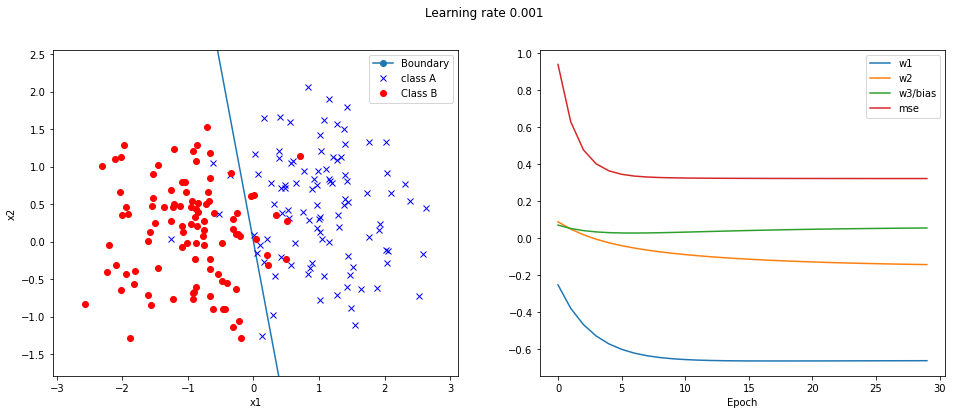

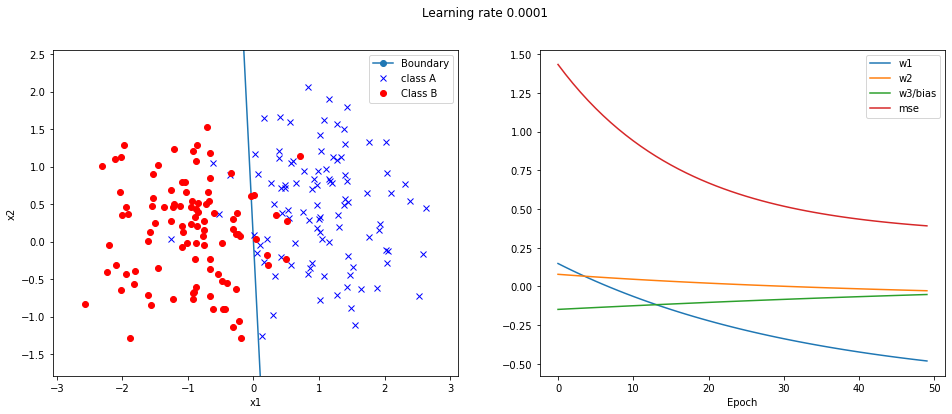

In [30]:
n = 100                   #number of samples for each class
mean_A = [1., .5]
cov_A = [[0.5, 0], 
         [0, 0.5]]  

mean_B = [-1., 0]
cov_B = [[0.5, 0], 
         [0, 0.5]]    

class_A, class_B, samples, targets = sample_data(n, mean_A, cov_A, mean_B, cov_B, add_bias = True, shuffle = True)

lr = 0.001
W, all_W, mse = delta_learn(samples, targets, epochs = 30, learning_rate = lr)
plot(W,class_A,class_B, all_W, mse, learning_rate = lr)
lr = 0.0001
W, all_W, mse = delta_learn(samples, targets, epochs = 50, learning_rate = lr)
plot(W,class_A,class_B, all_W, mse, learning_rate = lr)

Compare sequential with a batch learning approach for the Delta rule.
How quickly (in terms of epochs) do the algorithms converge? Please ad-
just the learning rate and plot the learning curves for each variant. Bear
in mind that for sequential learning you should not use the matrix form
of the learning rule discussed in section 2.2 and instead perform updates
iteratively for each sample. How sensitive is learning to random initialisa-
tion?

In [31]:
def sequential_delta_learn(X, T, epochs = 20, lr = 0.001, mu = 0, sigma = 0.1):
    W = init_weights(X, T, mu, sigma)
    all_mse = []
    for epoch in range(epochs):
        mse = np.sum((T - W @ X) ** 2) / X.shape[1]
        all_mse.append(mse)
        for x, target in zip(X.T, T[0]):                         #iterate over all samples
            for i in range(len(x)):                              #iterate over x dimension
                dw = -lr *(W @ x - target) * x.T
                W += dw
    return W, all_mse

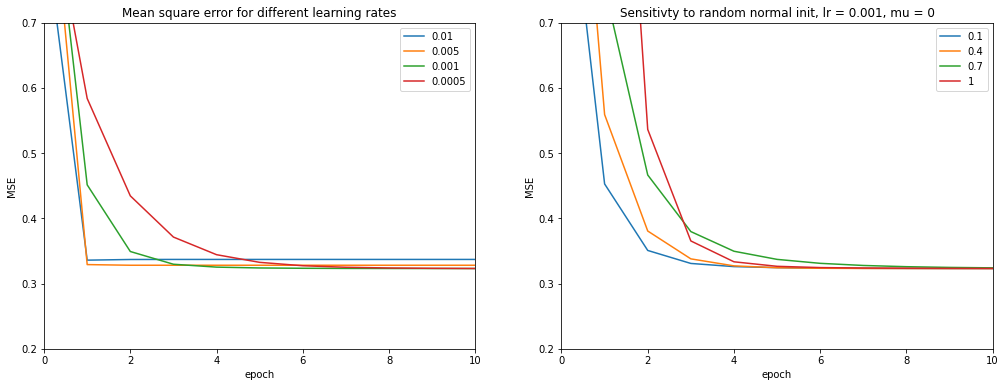

In [32]:
learning_rates = [0.01, 0.005, 0.001, 0.0005]

lr_mse = []
for learning_rate in learning_rates:
    _ , mse = sequential_delta_learn(samples, targets, epochs = 20, lr = learning_rate)
    lr_mse.append(mse)


sigmas = [0.1, 0.4, 0.7, 1]
sigma_mse = []
for sigma in sigmas:
    _ , mse = sequential_delta_learn(samples, targets, epochs = 20, lr = 0.001, mu = 0, sigma = sigma)
    sigma_mse.append(mse)
    
fig, ax = plt.subplots(1,2, figsize=(17,6))

for lr_mse, s_mse in zip(lr_mse,sigma_mse):
    ax[0].plot(lr_mse)                             #plot for different learning rates 
    ax[1].plot(s_mse)                           #plot for different sigmas for W init
ax[0].legend(list(map(str, learning_rates)))    
ax[1].legend(list(map(str, sigmas)))    

ax[0].set_title("Mean square error for different learning rates")
ax[1].set_title("Sensitivty to random normal init, lr = 0.001, mu = 0")

for a in ax:
    a.set_ylim(0.2,0.7)
    a.set_xlim(0, 10)
    a.set_xlabel("epoch")
    a.set_ylabel("MSE")

Remove the bias, train your network with the Delta rule in batch mo-
de and test its behaviour. In what cases would the perceptron without
bias converge and classify correctly all data samples? Please verify your
hypothesis by adjusting data parameters, mA and mB.


* The data can be linearly seperated if its possible to draw a line through (0,0). However, for the example below this is not possible

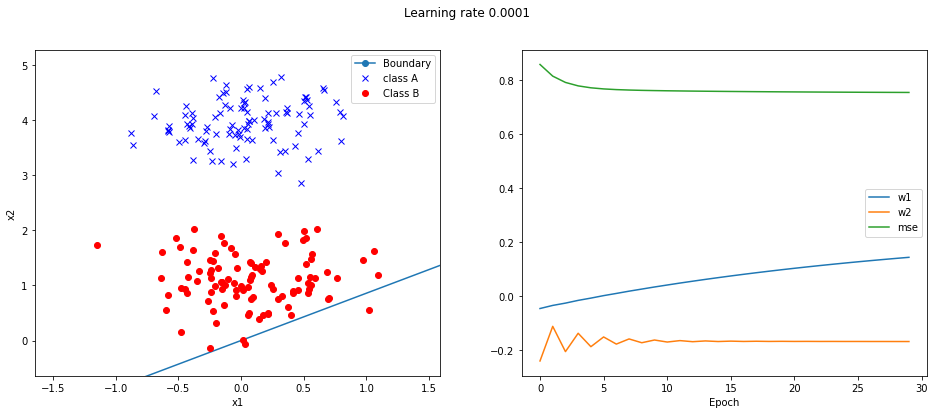

In [33]:
n = 100                   
mean_A = [0, 4]
cov_A = [[0.2, 0], 
         [0, 0.2]]  

mean_B = [0, 1]
cov_B = [[0.2, 0], 
         [0, 0.2]]    

class_A, class_B, samples, targets = sample_data(n, mean_A, cov_A, mean_B, cov_B, add_bias = False, shuffle = True)
W, all_W, mse = delta_learn(samples, targets, epochs = 30, learning_rate = 0.001)

plot(W,class_A,class_B, all_W, mse, learning_rate = lr)

# Classification of samples that are not linearly separable